# Data cleaning and validation challenge

### Import of packages used


In [ ]:
import pandas as pd
import re

### Loading of the database

In [91]:
wellcome_apc_spend = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding ='latin1')

- Here we make a temporary copy of the database to modify it but still easily access the original for reference.


In [157]:
wellcome_temporary = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding ='latin1')

#### First we display our data to identify any issues that require cleaning. In this case I displayed several rows with the purpose of showing the following problems with the data:

1. The IDs (PMID and PMCID) are sometimes missing.
2. The format of the IDs is not consistent. Some have labels at the front and some are just numbers.
3. Some of the IDs have semicolons and/or other characters to separate them and others don't.
4. There are cases where we only either have PMID or PMCID.
5. Although most PMCIDs contain 7 numbers and PMIDs contain 8, there are some cases where they have significantly more numbers.
6. Some IDs also have other information such as the date of publication.
7. The pounds sign can interfere when analysing the data.
8. There seem to be some siginificant outliers in the prices of the journals, ex. £0.00


### Data Cleaning

#### In order to keep the format uniform and avoid problems with different capitalization, the journal title is changed to lowercase.

In [158]:
wellcome_temporary['Journal title'] = wellcome_temporary['Journal title'].str.lower() 
wellcome_temporary.head() 

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88


#### In order to differentiate between PMID and PMCID, the following two functions separate both into different columns.

* This function obtains the 7-digit id that starts with 3 from the alphanumeric id. 

In [43]:
def get_pmcid(x):
    pmcid = re.findall('3\d{6}', str(x))
    if len(pmcid) > 0:
        return pmcid[- 1]

* This function obtains the 8-digit id that starts with 2 from the alphanumeric id. 

In [45]:
def get_pmid(x):
    pmid = re.findall('2\d{7}', str(x))
    if len(pmid) > 0:
        return pmid[0]

* We apply the above functions to the data and create two columns, one for PMID and one for PMCID.

In [159]:
wellcome_temporary['PMID'] = wellcome_temporary['PMID/PMCID'].apply(get_pmid)
wellcome_temporary['PMCID'] = wellcome_temporary['PMID/PMCID'].apply(get_pmcid)

* We drop the old column of IDs.

In [160]:
del wellcome_temporary['PMID/PMCID']

In [161]:
wellcome_temporary.head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),PMID,PMCID
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,None,None
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,None,3679557
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,23043264,3506128
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,23438330,3646402
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88,23438216,3601604


* In this step, we check for duplicate IDs. What is evident is that most if not all duplicates are missing values. In this case, we can see that PMID is missing in 1677 IDs and PMCID is missing 371 (a total of 2038), which is a significant amount of our sample (N = 2127). Therefore, deleting either duplicates or missing values could cause problems in our analysis. 

In [162]:
pmid = wellcome_temporary['PMID']
wellcome_temporary[pmid.isin(pmid[pmid.duplicated()])]

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),PMID,PMCID
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,None,None
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,None,3679557
5,ACS,journal of medicinal chemistry,Comparative Structural and Functional Studies ...,£2392.20,None,3579457
6,ACS,journal of proteome research,Mapping Proteolytic Processing in the Secretom...,£2367.95,None,3709265
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,None,3780468
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,£1294.78,None,3621575
10,ACS (Amercian Chemical Society) Publications,journal of chemical information and modeling,Locating Sweet Spots for Screening Hits and Ev...,£1329.69,None,3739413
11,ACS (Amercian Chemical Society) Publications,journal of medicinal chemistry,Synthesis and evaluation of ?-thymidine analog...,£1287.20,None,3530961
12,ACS (Amercian Chemical Society) Publications,journal of medicinal chemistry,Discovery and structure-activity relationships...,£1324.66,None,3624797
13,ACS Publications,biochemistry,Monomeric 14-3-3 has a chaperone-like activity...,£665.64,None,3413243


In [163]:
pmcid = wellcome_temporary['PMCID']
wellcome_temporary[pmcid.isin(pmcid[pmcid.duplicated()])].head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),PMID,PMCID
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,None,None
16,AMBSB,journal of biological chemistry,Annexin-1 interaction with FPR2/ALX,£265.67,22610094,None
21,American Chemical Society,acs chemical biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,£947.07,None,None
29,American Chemical Society,journal of medicinal chemistry,Toward biophysical probes for the 5-HT3 recept...,£572.74,20146481,None
43,American Psychiatric Association,american journal of psychiatry,Methamphetamine-induced disruption of frontost...,£2351.73,None,None


In [164]:
title = wellcome_temporary['Article title']
wellcome_temporary[title.isin(title[title.duplicated()])].head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),PMID,PMCID
1490,Public Library of Science,plos one,"Exclusive breastfeeding, diarrhoel morbidity a...",£825.68,None,None
1496,Public Library of Science,plos one,"Exclusive breastfeeding, diarrhoel morbidity a...",£825.68,None,None


* The code above shows that we have one journal title is duplicated. Therefore we remove it:

In [165]:
title = wellcome_temporary['Article title']
wellcome_temporary.drop(wellcome_temporary[(title == 'Exclusive breastfeeding, diarrhoel morbidity a')].index).head()


,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),PMID,PMCID
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00,None,None
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,None,3679557
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,23043264,3506128
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,23438330,3646402
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,£685.88,23438216,3601604


- Convert cost to only numbers by removing pounds sign. Also changed the column number to GBPs for simplicity.

In [166]:
cost = wellcome_temporary['COST (£) charged to Wellcome (inc VAT when charged)']
wellcome_temporary['GBPs'] = wellcome_temporary['COST (£) charged to Wellcome (inc VAT when charged)'].str.lstrip('£')
wellcome_temporary['GBPs'] = pd.to_numeric(wellcome_temporary.GBPs, errors='coerce')
del wellcome_temporary['COST (£) charged to Wellcome (inc VAT when charged)']
wellcome_temporary.head()



,Publisher,Journal title,Article title,PMID,PMCID,GBPs
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,None,None,0.00
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,None,3679557,2381.04
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",23043264,3506128,642.56
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,23438330,3646402,669.64
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,23438216,3601604,685.88


In [167]:
wellcome_temporary.describe()

,GBPs
count,2114.000000
mean,24206.441892
std,147300.992149
min,0.000000
25%,1280.000000
50%,1889.950000
75%,2322.315000
max,999999.000000


- The distribution of data shown above shows that there are significant outliers in the price of the journals and/or have an unreasonable high price. Hence, we can remove the journals with an unreasonable high price. 

In [168]:
filter_price_above_3000 = wellcome_temporary[wellcome_temporary['GBPs'] > 3000]

wellcome_temporary.drop(wellcome_temporary[(wellcome_temporary.GBPs > 3000.0)].index, inplace=True)
wellcome_temporary

,Publisher,Journal title,Article title,PMID,PMCID,GBPs
0,CUP,psychological medicine,Reduced parahippocampal cortical thickness in ...,None,None,0.00
1,ACS,biomacromolecules,Structural characterization of a Model Gram-ne...,None,3679557,2381.04
2,ACS,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",23043264,3506128,642.56
3,ACS,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,23438330,3646402,669.64
4,ACS,j org chem,Regioselective opening of myo-inositol orthoes...,23438216,3601604,685.88
5,ACS,journal of medicinal chemistry,Comparative Structural and Functional Studies ...,None,3579457,2392.20
6,ACS,journal of proteome research,Mapping Proteolytic Processing in the Secretom...,None,3709265,2367.95
7,ACS,mol pharm,Quantitative silencing of EGFP reporter gene b...,23057412,3495574,649.33
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,A Novel Allosteric Inhibitor of the Uridine Di...,None,3780468,1294.59
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,Chemical proteomic analysis reveals the drugab...,None,3621575,1294.78


- We also check to see how many values are NaN. Since we get 13, we can also drop these values.

In [177]:
wellcome_temporary['GBPs'].isnull().sum().sum()

13

In [242]:
wellcome_temporary.dropna(subset=['GBPs'])
wellcome_temporary.head()

,Publisher,Journal title,Article title,PMID,PMCID,GBPs
1,ACS,biomacromolecules,structural characterization of a model gram-ne...,None,3679557,2381.04
5,ACS,journal of medicinal chemistry,comparative structural and functional studies ...,None,3579457,2392.20
6,ACS,journal of proteome research,mapping proteolytic processing in the secretom...,None,3709265,2367.95
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,None,3780468,1294.59
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,None,3621575,1294.78


- We also drop the values that don't have neither PMID or PCMID

In [243]:
wellcome_temporary.dropna(subset=['PMID', 'PMCID'], how='all')
wellcome_temporary.head()

,Publisher,Journal title,Article title,PMID,PMCID,GBPs
1,ACS,biomacromolecules,structural characterization of a model gram-ne...,None,3679557,2381.04
5,ACS,journal of medicinal chemistry,comparative structural and functional studies ...,None,3579457,2392.20
6,ACS,journal of proteome research,mapping proteolytic processing in the secretom...,None,3709265,2367.95
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,None,3780468,1294.59
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,None,3621575,1294.78


- In order to normalize the sample, we drop outliers which values are above 2400 and below 1000 pounds.

In [246]:
filter_price_above_2400 = wellcome_temporary[wellcome_temporary['GBPs'] > 2400]
wellcome_temporary.drop(wellcome_temporary[(wellcome_temporary.GBPs > 2400)].index, inplace=True)
wellcome_temporary.head()

,Publisher,Journal title,Article title,PMID,PMCID,GBPs
1,ACS,biomacromolecules,structural characterization of a model gram-ne...,None,3679557,2381.04
5,ACS,journal of medicinal chemistry,comparative structural and functional studies ...,None,3579457,2392.20
6,ACS,journal of proteome research,mapping proteolytic processing in the secretom...,None,3709265,2367.95
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,None,3780468,1294.59
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,None,3621575,1294.78


In [249]:
filter_price_below_1000 = wellcome_temporary[wellcome_temporary['GBPs'] < 1000]
wellcome_temporary.drop(wellcome_temporary[(wellcome_temporary.GBPs < 1000)].index, inplace=True)
wellcome_temporary.head()

,Publisher,Journal title,Article title,PMID,PMCID,GBPs
1,ACS,biomacromolecules,structural characterization of a model gram-ne...,None,3679557,2381.04
5,ACS,journal of medicinal chemistry,comparative structural and functional studies ...,None,3579457,2392.20
6,ACS,journal of proteome research,mapping proteolytic processing in the secretom...,None,3709265,2367.95
8,ACS (Amercian Chemical Society) Publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,None,3780468,1294.59
9,ACS (Amercian Chemical Society) Publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,None,3621575,1294.78


### Data after cleaning

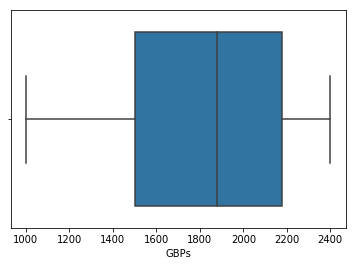

In [251]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
x = wellcome_temporary['GBPs']
sns.boxplot(x)
plt.show()

In [253]:
wellcome_temporary.shape

(1457, 6)

### Drill questions

#### What are the five most common journals and the total articles for each?

In [254]:
wellcome_temporary['Journal title'].value_counts()[:5]


plos one                           67
journal of biological chemistry    45
neuroimage                         22
plos pathogens                     22
plos genetics                      22
Name: Journal title, dtype: int64

#### Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [257]:
wellcome_temporary.describe()

,GBPs
count,1444.000000
mean,1813.519204
std,415.926974
min,1000.000000
25%,1500.000000
50%,1877.480000
75%,2178.675000
max,2400.000000


#### What is the open access prices paid by subject area?

In [256]:
wellcome_temporary.groupby('Journal title').describe().head().reset_index()

Journal title  GBPs                                 \
                                      count      mean         std      min   
0  academy of nutrition and dietetics   1.0  2379.540         NaN  2379.54   
1                acs chemical biology   4.0  1535.965  500.670917  1267.76   
2           acs chemical neuroscience   1.0  1186.800         NaN  1186.80   
3                  acta diabetologica   1.0  2336.280         NaN  2336.28   
4                    acta neuropathol   1.0  1901.040         NaN  1901.04   

                                            
         25%       50%        75%      max  
0  2379.5400  2379.540  2379.5400  2379.54  
1  1287.8825  1294.685  1542.7675  2286.73  
2  1186.8000  1186.800  1186.8000  1186.80  
3  2336.2800  2336.280  2336.2800  2336.28  
4  1901.0400  1901.040  1901.0400  1901.04